# Supervised learning: 
## predicting an output variable from high-dimensional observations
http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The problem solved in supervised learning

Supervised learning consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.

All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.

### Vocabulary: classification and regression

If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a classification task. On the other hand, if the goal is to predict a continuous target variable, it is said to be a regression task.

When doing classification in scikit-learn, y is a vector of integers or strings.

Note: See the Introduction to machine learning with scikit-learn Tutorial for a quick run-through on the basic machine learning vocabulary used within scikit-learn.

## Nearest neighbor and the curse of dimensionality

#### Classifying irises:

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dataset_001.png" style="width:500px;height:250;">
The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width:

In [3]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> iris_X = iris.data
>>> iris_y = iris.target
>>> np.unique(iris_y)

array([0, 1, 2])

### k-Nearest neighbors classifier¶
The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector. (Please see the Nearest Neighbors section of the online Scikit-learn documentation for more information about this type of classifier.)

### Training set and testing set

While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

### KNN (k nearest neighbors) classification example:
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png" style="width:500px;height:250;">

In [4]:
>>> # Split iris data in train and test data
>>> # A random permutation, to split the data randomly
>>> np.random.seed(0)
>>> indices = np.random.permutation(len(iris_X))
>>> iris_X_train = iris_X[indices[:-10]]
>>> iris_y_train = iris_y[indices[:-10]]
>>> iris_X_test  = iris_X[indices[-10:]]
>>> iris_y_test  = iris_y[indices[-10:]]

In [5]:
>>> # Create and fit a nearest-neighbor classifier
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier()
>>> knn.fit(iris_X_train, iris_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
knn.predict(iris_X_test) 

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [7]:
>>> iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### The curse of dimensionality
For an estimator to be effective, you need the distance between neighboring points to be less than some value d, which depends on the problem. In one dimension, this requires on average n \sim 1/d points. In the context of the above k-NN example, if the data is described by just one feature with values ranging from 0 to 1 and with n training observations, then new data will be no further away than 1/n. Therefore, the nearest neighbor decision rule will be efficient as soon as 1/n is small compared to the scale of between-class feature variations.

If the number of features is p, you now require n \sim 1/d^p points. Let’s say that we require 10 points in one dimension: now 10^p points are required in p dimensions to pave the [0, 1] space. As p becomes large, the number of training points required for a good estimator grows exponentially.

For example, if each point is just a single number (8 bytes), then an effective k-NN estimator in a paltry p \sim 20 dimensions would require more training data than the current estimated size of the entire internet (±1000 Exabytes or so).

This is called the curse of dimensionality and is a core problem that machine learning addresses.

## Linear model: from regression to sparsity
### Diabetes dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:  

The task at hand is to predict disease progression from physiological variables.

In [8]:
>>> diabetes = datasets.load_diabetes()
>>> diabetes_X_train = diabetes.data[:-20]
>>> diabetes_X_test  = diabetes.data[-20:]
>>> diabetes_y_train = diabetes.target[:-20]
>>> diabetes_y_test  = diabetes.target[-20:]

In [9]:
diabetes.data.shape

(442, 10)

### Linear regression¶
LinearRegression, in its simplest form, fits a linear model to the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png" style="width:500px;height:250;">
Linear models: $y = X\beta + \epsilon$  

$X: data$  
$y: target variable$  
$\beta: Coefficients$  
$\epsilon: Observation noise$  

In [11]:
from sklearn import linear_model
>>> regr = linear_model.LinearRegression()
>>> regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
regr.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

In [16]:
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898225

In [17]:
>>> # Explained variance score: 1 is perfect prediction
>>> # and 0 means that there is no linear relationship
>>> # between X and y.
>>> regr.score(diabetes_X_test, diabetes_y_test) 

0.58507530226905713

### Shrinkage
If there are few data points per dimension, noise in the observations induces high variance:

In [30]:
>>> X = np.c_[ .5, 1].T
X

array([[ 0.5],
       [ 1. ]])

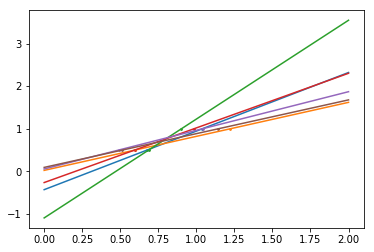

In [40]:
>>> y = [.5, 1]
>>> test = np.c_[ 0, 2].T
>>> regr = linear_model.LinearRegression()

>>> np.random.seed(0)
>>> for _ in range(6): 
...    this_X = .1*np.random.normal(size=(2, 1)) + X
...    regr.fit(this_X, y)  # 可以逐一的 fit
...    plt.plot(test, regr.predict(test)) 
...    plt.scatter(this_X, y, s=3)

A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called [Ridge regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge):

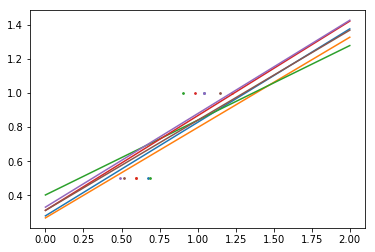

In [42]:
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)

for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3) 

This is an example of bias/variance tradeoff: the larger the ridge alpha parameter, the higher the bias and the lower the variance.

We can choose alpha to minimize left out error, this time using the diabetes dataset rather than our synthetic data:

In [46]:
np.logspace(-4, -1, 6)

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

In [44]:
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train,).score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas]) 

[0.58511106838835336, 0.58520730154446787, 0.58546775406984919, 0.58555120365039148, 0.58307170855541635, 0.57058999437280111]


#### Note:
Capturing in the fitted parameters noise that prevents the model to generalize to new data is called overfitting. The bias introduced by the ridge regression is called a regularization.

### Sparsity
Fitting only features 1 and 2
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_3d_001.png" style="width:500px;height:250;">
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_3d_003.png" style="width:500px;height:250;">
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_3d_002.png" style="width:500px;height:250;">

#### Note
A representation of the full diabetes dataset would involve 11 dimensions (10 feature dimensions and one of the target variable). It is hard to develop an intuition on such representation, but it may be useful to keep in mind that it would be a fairly empty space.
We can see that, although feature 2 has a strong coefficient on the full model, it conveys little information on y when considered with feature 1.

To improve the conditioning of the problem (i.e. mitigating the The curse of dimensionality), it would be interesting to select only the informative features and set non-informative ones, like feature 2 to 0. Ridge regression will decrease their contribution, but not set them to zero. Another penalization approach, called Lasso (least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: prefer simpler models.

In [47]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


### Different algorithms for the same problem

Different algorithms can be used to solve the same mathematical problem. For instance the Lasso object in scikit-learn solves the lasso regression problem using a coordinate descent method, that is efficient on large datasets. However, scikit-learn also provides the LassoLars object using the LARS algorithm, which is very efficient for problems in which the weight vector estimated is very sparse (i.e. problems with very few observations).

### Classification
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_001.png" style="width:500px;height:250;">
For classification, as in the labeling iris task, linear regression is not the right approach as it will give too much weight to data far from the decision frontier. A linear approach is to fit a sigmoid function or logistic function:

$y = \textrm{sigmoid}(X\beta - \textrm{offset}) + \epsilon =
\frac{1}{1 + \textrm{exp}(- X\beta + \textrm{offset})} + \epsilon$

In [49]:
>>> logistic = linear_model.LogisticRegression(C=1e5)
>>> logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [50]:
logistic.score(iris_X_test, iris_y_test)

0.90000000000000002

### Multiclass classification

If you have several classes to predict, an option often used is to fit one-versus-all classifiers and then use a voting heuristic for the final decision.

### Shrinkage and sparsity with logistic regression

The C parameter controls the amount of regularization in the LogisticRegression object: a large value for C results in less regularization. penalty="l2" gives Shrinkage (i.e. non-sparse coefficients), while penalty="l1" gives Sparsity.

### Exercise

Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.

In [53]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_train = int(y_digits.shape[0] * 0.9)
X_train = X_digits[:n_train]
y_train = y_digits[:n_train]
X_test = X_digits[n_train:]
y_test = y_digits[n_train:]

logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train).score(X_test, y_test)

0.93888888888888888

In [54]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train).score(X_test, y_test)

0.96111111111111114

## Support vector machines (SVMs)
### Linear SVMs
Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build a plane maximizing the margin between the two classes. Regularization is set by the C parameter: a small value for C means the margin is calculated using many or all of the observations around the separating line (more regularization); a large value for C means the margin is calculated on observations close to the separating line (less regularization).

#### Unregularized SVM
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_001.png" style="width:500px;height:250;">
#### Regularized SVM (default)
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_002.png" style="width:500px;height:250;">

SVMs can be used in regression –SVR (Support Vector Regression)–, or in classification –SVC (Support Vector Classification).

In [55]:
>>> from sklearn import svm
>>> svc = svm.SVC(kernel='linear')
>>> svc.fit(iris_X_train, iris_y_train)    

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
svc.score(iris_X_test, iris_y_test)

0.90000000000000002

In [58]:
svc.fit(X_train, y_train).score(X_test, y_test)

0.96666666666666667

### Using kernels
Classes are not always linearly separable in feature space. The solution is to build a decision function that is not linear but may be polynomial instead. This is done using the kernel trick that can be seen as creating a decision energy by positioning kernels on observations:

#### Linear kernel	
` svc = svm.SVC(kernel='linear')`
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_001.png" style="width:500px;height:250;">
#### Polynomial kernel
`>>> svc = svm.SVC(kernel='poly' degree=3)`
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_002.png" style="width:500px;height:250;">
#### RBF kernel (Radial Basis Function)
`svc = svm.SVC(kernel='rbf')`
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_003.png" style="width:500px;height:250;">


### Exercise

Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.

Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class.

Hint: You can use the decision_function method on a grid to get intuitions.

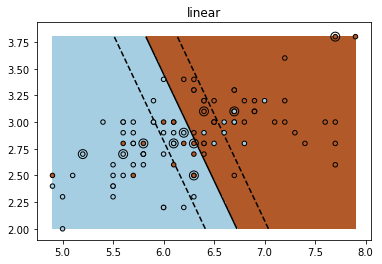

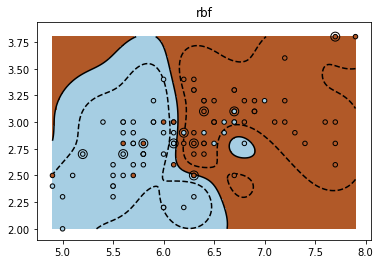

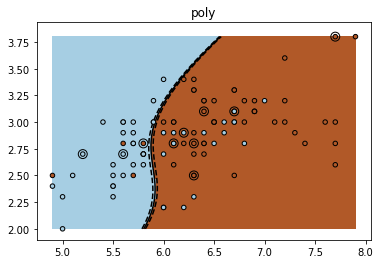

In [60]:
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

n = int(.9 * n_sample)
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()